### APS1070 Project 1 --- Basic Principles and Models
**Deadline: Oct 4th, 11PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself without proper acknowledgment of the source, including generated code (please refer to the course syllabus). Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Xinle Cui  *(here and elsewhere, please replace the underscore with your answer)*

Student ID: 1006837666

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Check that the completed `.ipynb` file runs correctly when using `Runtime -> Run All`.

2. Download your notebook: `File -> Download .ipynb`

3. Click on the Files icon on the far left menu of Colab

4. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


5. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

6. An HTML version of your notebook will appear in the files, so you can download it.

7. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



# Project 1 [10 Marks]
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with the [California housing dataset](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html). This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people). The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).


Download the dataset using the cells below:

In [46]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_california_housing()

## Part 1: Getting started [2.5 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**

* How many features do we have in this dataset? 8
* Determine the median target value. 1.797
* How many individuals have a target value greater than the median target value? 10317


Now add an additional column containing either 0 (if the target value is below the median or equal to the median) or 1 (if the target value is greater than the median). This will be the new target value to classify the data as images with a digit below median or above median. **[0.5]**

In [47]:

import pandas as pd
# Create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings.
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

# How many feature in the dataset?
print(f'Number of features: {len(dataset.feature_names)}')

# Median target value
median_target = np.median(dataset.target)
print('Median target value:', median_target)

# How many individuals have a target value greater than the median target value?
count_greater_than_median = df[df['target'] > median_target].shape[0]
print('Number of individuals with target value greater than the median:', count_greater_than_median)

# Add an additional column containing either 0 (if the target value is below the median or equal to the median) or 1 (if the target value is greater than the median).
df['new_target'] = df['target'].apply(lambda x: 1 if x > median_target else 0)

df.describe()


Number of features: 8
Median target value: 1.797
Number of individuals with target value greater than the median: 10317


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,new_target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558,0.499855
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956,0.500012
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000,0.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000,0.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250,1.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010,1.000000


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.)

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=1``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

**Only Split the dataset once within you notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [48]:
from sklearn.model_selection import train_test_split
# Define X and y
X = df.drop(columns=['target', 'new_target'], axis=1)
y = df['new_target']

# Split the dataset into a train and a test set "70:30", use random_state=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Create a training set for easy access
train = pd.DataFrame(X_train, columns=X.columns)
train['new_target'] = y_train.values
X_test.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000
mean,3.866896,28.810239,5.415536,1.094134,1417.516796,2.947914,35.637487,-119.567114
std,1.927250,12.600403,2.236374,0.401210,1136.724929,1.056241,2.137084,1.995951
min,0.499900,2.000000,1.130435,0.375000,9.000000,0.692308,32.550000,-124.350000
25%,2.554625,18.000000,4.440153,1.005837,785.000000,2.430380,33.940000,-121.770000
50%,3.531300,29.000000,5.226550,1.048314,1171.500000,2.822018,34.260000,-118.510000
75%,4.747275,37.000000,6.025400,1.099151,1729.000000,3.301622,37.720000,-118.010000
max,15.000100,52.000000,62.422222,14.111111,28566.000000,51.400000,41.860000,-114.490000


### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is `Population`, and the y-axis is `Latitude`, and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but standardize the two features. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? **[0.6]**




Answer:<br><p>
Difference: <br>The range of the x&y-axis. X-aixs before [0-35000], after[0-30]. Y-aixs before [22.5-42.5], after [-6-2]<br><p>
Why similar: <br>Standardization only changes the scale of the features but not the underlying relationships between the x and y.<br><p>
Advantage: <br>KNN can be sensitive to the ranges of different features. Without standardization,dimensions with larger feature values may dominate the learning process of the model, thus affecting the performance of the model.

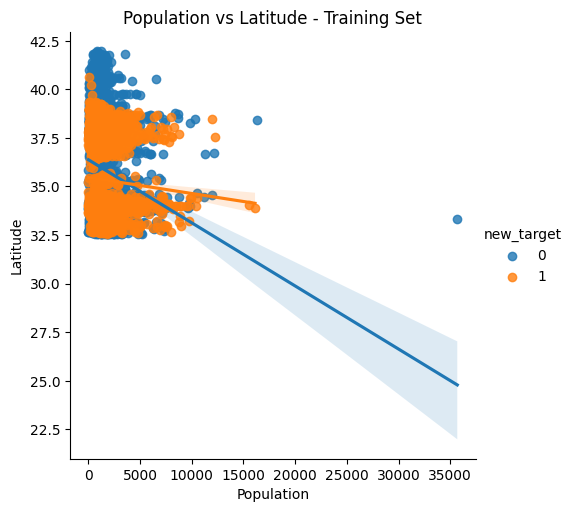

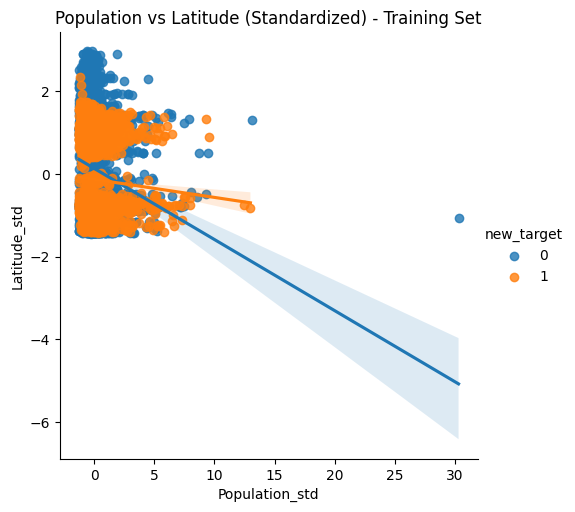

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Draw a plot where the x-axis is `Population`, and the y-axis is `Latitude`, and the color of each datapoint indicates its class.
sns.lmplot(data=train, x='Population', y='Latitude', hue='new_target')
plt.title("Population vs Latitude - Training Set")


# Standardizing the two features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[['Population_std', 'Latitude_std']] = scaler.fit_transform(train[['Population', 'Latitude']])

# Draw a plot where the x-axis is `Population_std`, and the y-axis is `Latitude_std`, and the color of each datapoint indicates its class.
sns.lmplot(data=train, x='Population_std', y='Latitude_std', hue='new_target')
plt.title('Population vs Latitude (Standardized) - Training Set')
plt.show()


## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether the digit written on the image is less than the median or greater than the median.

Follow these steps:

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 1000 (feel free to use a step size larger than 1), and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**



Answer:<br><p>
2: <br>k = 1, highest cross-validation accuracy is 0.6098409310581481<br><p>
3：<br> Overfit: [1~10], because the gap between training and validation accuracy is the largest, especiallty at k = 1.<br>
Underfit:[600~1000] both train and test scores decrease and toward a similar value(5.25). This is sign of underfitting

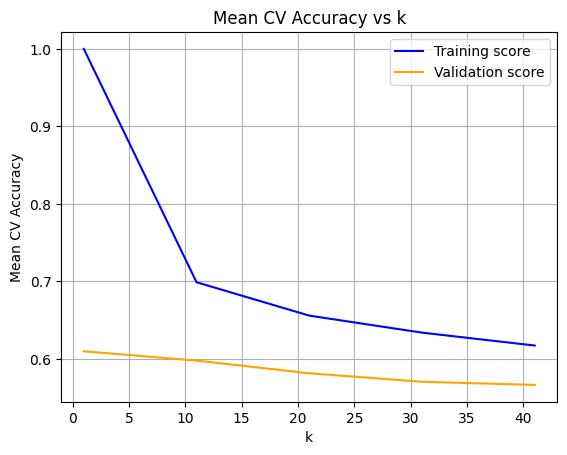

Highest Mean cross-validation accuracy: 0.6098409310581481 at k = 1


In [50]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN cross-validation function
def knn_validation_curve(X_train, y_train, k: int, step: int):
    k_value = list(range(1, k+1, step))
    train_score = []
    val_score = []
    
    for i in k_value:
        knn_model = KNeighborsClassifier(n_neighbors=i)
        scores = cross_validate(knn_model, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)
        train_score.append(scores['train_score'].mean())
        val_score.append(scores['test_score'].mean())
    
    return k_value, train_score, val_score

# Run the function
k_value, train_score, val_score = knn_validation_curve(X_train, y_train, k=1000, step=10)

# show a plot of the mean cross-validation accuracy vs `k`
plt.plot(k_value, train_score, label="Training score", color="blue")
plt.plot(k_value, val_score, label="Validation score", color="orange")
plt.title('Mean CV Accuracy vs k')
plt.xlabel('k')
plt.ylabel('Mean CV Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Find the best k and the corresponding highest accuracy
print('Highest Mean cross-validation accuracy:', np.max(val_score), 'at k =', k_value[np.argmax(val_score)])

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy.
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!.

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2.
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7).

7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]** <p>
  Answer: The number of essential features for classification appears to be 5. This is because when we have fewer than 5 features, the mean cross-validation accuracy drops significantly, which means the model’s performance starts to deteriorate.Additionally, the mean CV accuracy peaks or is nearly the highest when the number of features is 5, which means that having 5 features provides a balance between maintaining model performance and reducing feature complexity.  
  









You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order.
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [51]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
importance =  dt.feature_importances_
importance_dict = {name: float(importance) for name, importance in zip(X_train.columns, dt.feature_importances_)}
sorted_importance_dict = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))
sorted_features = list(sorted_importance_dict.keys())

print(sorted_importance_dict)
print(sorted_features)

{'MedInc': 0.3721200207749806, 'Longitude': 0.15831822597438205, 'Latitude': 0.13533688582240097, 'AveOccup': 0.134717298834824, 'AveRooms': 0.06274085988248626, 'HouseAge': 0.05138217071437986, 'AveBedrms': 0.04568311017094454, 'Population': 0.03970142782560167}
['MedInc', 'Longitude', 'Latitude', 'AveOccup', 'AveRooms', 'HouseAge', 'AveBedrms', 'Population']


In [52]:
from sklearn import tree

def Feature_selector(X_train, y_train, tr=0.95):
    
    dt = tree.DecisionTreeClassifier(random_state=1)
    dt.fit(X_train, y_train)
    importance =  dt.feature_importances_
    importance_dict = {name: float(importance) for name, importance in zip(X_train.columns, dt.feature_importances_)}
    sorted_importance_dict = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))
    
    full_feature_score = np.max(val_score)
    sorted_features = list(sorted_importance_dict.keys())
    remove_features = []
    mean_cv_scores = []
    k_values = []
    num_features_list = []
    
    k_range = range(1, 1000, 10)
    
    print(f"Mean CV accuracy with 8 features: {np.max(val_score):.4f} at k={k_value[np.argmax(val_score)]}")
   
    
    X_train_copy = X_train.copy()
    
    # WHile Loop for knn
    while len(sorted_features) > 1:
        least_important_feature = sorted_features.pop(-1)
        remove_features.append(least_important_feature)
        X_train_copy.drop(columns=[least_important_feature], inplace=True)        
        best_score = 0.0
        best_k = None
        for k in k_range:
            knn = KNeighborsClassifier(n_neighbors=k)
            scores = cross_validate(knn, X_train_copy, y_train, cv=5, n_jobs=-1)
            mean_score = scores['test_score'].mean()
            if mean_score > best_score:
                best_score = mean_score
                best_k = k
        mean_cv_scores.append(best_score)
        k_values.append(best_k)
        num_features_list.append(len(X_train_copy.columns))
        print(f"Mean CV accuracy with {len(X_train_copy.columns)} features: {best_score:.4f} at k={best_k}")
        
        # Check stop condition
        if best_score < tr * full_feature_score:
            print("Cross-validation accuracy dropped below threshold.")
            break
            
    # add back full feature information
    mean_cv_scores.insert(0, full_feature_score)
    mean_cv_scores = [float(score) for score in mean_cv_scores]
    k_values.insert(0, 1)
    num_features_list.insert(0,len(X_train.columns))
            
    return remove_features, mean_cv_scores, k_values, num_features_list

# Run the function
removed_features, mean_cv_scores, k_values, num_features_list = Feature_selector(X_train, y_train, tr=0.95)

# store the output
removed_features_without_std = removed_features.copy()
mean_cv_scores_without_std = mean_cv_scores.copy()
k_values_without_std = k_values.copy()
num_features_list_without_std = num_features_list.copy()

# Print the results
print('Removed features in order:', removed_features)
print('Mean cross-validation accuracies:', mean_cv_scores)
print('Best k values:', k_values)
print('Number of features at each step:', num_features_list)

Mean CV accuracy with 8 features: 0.6098 at k=1
Mean CV accuracy with 7 features: 0.8460 at k=21
Mean CV accuracy with 6 features: 0.8459 at k=21
Mean CV accuracy with 5 features: 0.8723 at k=11
Mean CV accuracy with 4 features: 0.8724 at k=11
Mean CV accuracy with 3 features: 0.8586 at k=11
Mean CV accuracy with 2 features: 0.8038 at k=31
Mean CV accuracy with 1 features: 0.7371 at k=41
Removed features in order: ['Population', 'AveBedrms', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']
Mean cross-validation accuracies: [0.6098409310581481, 0.8460002323573128, 0.8459309802963395, 0.8723007805528906, 0.8723701523856748, 0.8585963941498657, 0.8037786329485066, 0.7371263628534915]
Best k values: [1, 21, 21, 11, 11, 11, 31, 41]
Number of features at each step: [8, 7, 6, 5, 4, 3, 2, 1]


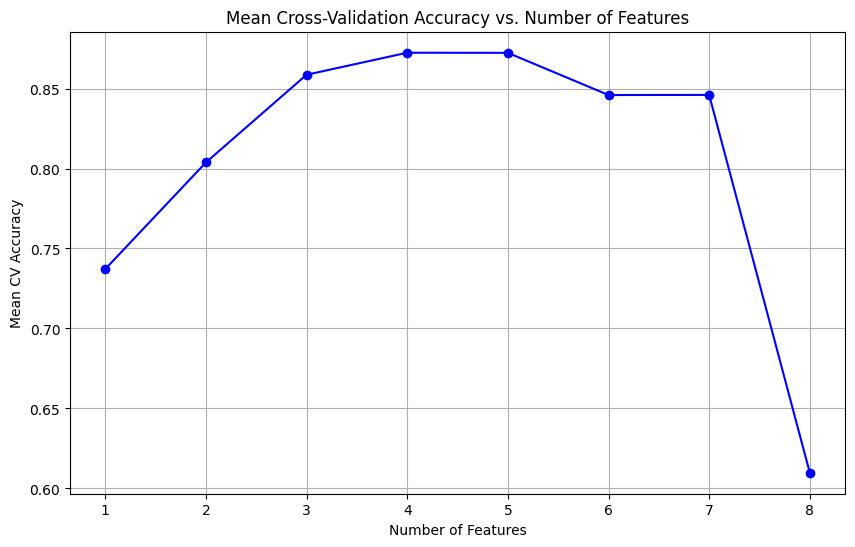

In [53]:
# Plot 1: Mean Cross-Validation Accuracy vs. Number of Features
plt.figure(figsize=(10, 6))
plt.plot(num_features_list, mean_cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Features')
plt.ylabel('Mean CV Accuracy')
plt.title('Mean Cross-Validation Accuracy vs. Number of Features')
plt.grid()
plt.show()

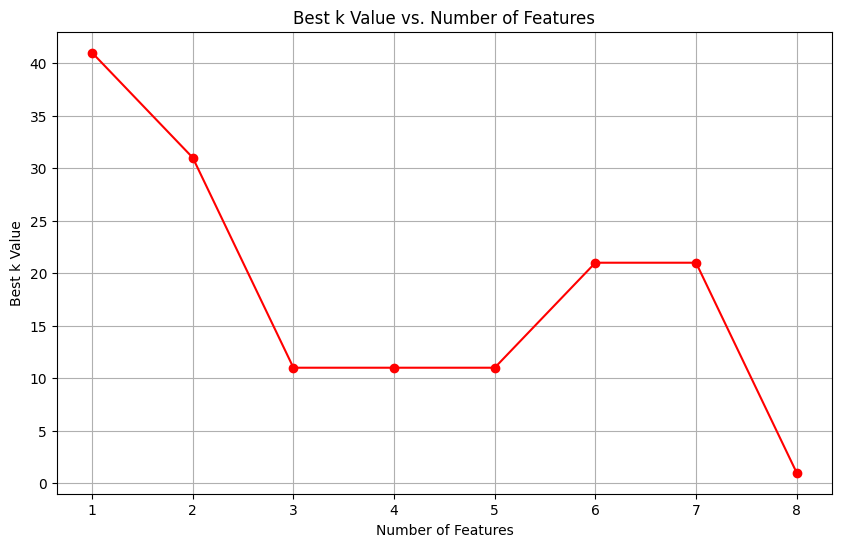

In [54]:
# Plot 2: Best k Value vs. Number of Features
plt.figure(figsize=(10, 6))
plt.plot(num_features_list, k_values, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Features')
plt.ylabel('Best k Value')
plt.title('Best k Value vs. Number of Features')
plt.grid()
plt.show()

## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one.

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html))

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%.
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?) <p>
Answer: The standardization help the model especially when we include all feature in the model which led to a significant increase in the initial cross-validation accuracy from 0.6098 (without standardization) to 0.8344 (with standardization).The model achieved the highest cross-validation accuracy of 0.8781 with standardization when using four features—MedInc, Longitude, Latitude, and AveOccup—at k = 11. Thus, standardization helped the model perform better, particularly when the optimal number of features was used at the appropriate value of k.


In [55]:
# Standardizing the training set
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)

# Part 2 - Full Feature 
k_value, train_score, val_score = knn_validation_curve(X_train_std, y_train, k=1000, step=10)

# Part 3 - Feature Selection
removed_features, mean_cv_scores, k_values, num_features_list = Feature_selector(X_train_std, y_train, tr=0.95)

# Store the output
removed_features_with_std = removed_features.copy()
mean_cv_scores_with_std = mean_cv_scores.copy()
k_values_with_std = k_values.copy()
num_features_list_with_std = num_features_list.copy()

# Print the results
print('Removed features in order:', removed_features)
print('Mean cross-validation accuracies:', mean_cv_scores)
print('Best k values:', k_values)
print('Number of features at each step:', num_features_list)


Mean CV accuracy with 8 features: 0.8344 at k=21
Mean CV accuracy with 7 features: 0.8494 at k=11
Mean CV accuracy with 6 features: 0.8495 at k=11
Mean CV accuracy with 5 features: 0.8667 at k=11
Mean CV accuracy with 4 features: 0.8781 at k=11
Mean CV accuracy with 3 features: 0.8575 at k=11
Mean CV accuracy with 2 features: 0.8025 at k=11
Mean CV accuracy with 1 features: 0.7377 at k=41
Cross-validation accuracy dropped below threshold.
Removed features in order: ['Population', 'AveBedrms', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']
Mean cross-validation accuracies: [0.8343719226130375, 0.8493914993155041, 0.8495294764414837, 0.8666944537267598, 0.8781147916988553, 0.8574890558507932, 0.802532455166417, 0.7376801158432953]
Best k values: [1, 11, 11, 11, 11, 11, 11, 41]
Number of features at each step: [8, 7, 6, 5, 4, 3, 2, 1]


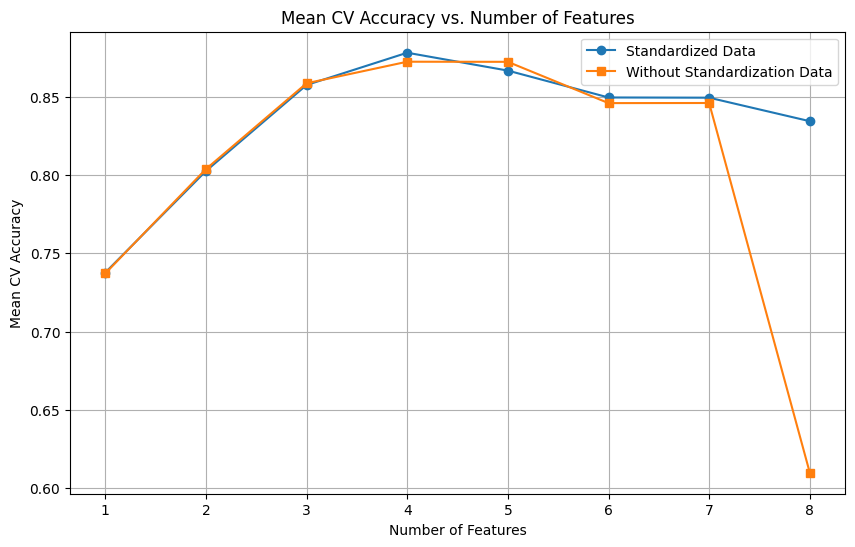

In [56]:
# Plot cross-validation accuracy vs. number of features for standardized data
plt.figure(figsize=(10, 6))
plt.plot(num_features_list_with_std, mean_cv_scores_with_std, marker='o', label='Standardized Data')

# Plot cross-validation accuracy vs. number of features for original data
plt.plot(num_features_list_without_std, mean_cv_scores_without_std, marker='s', label='Without Standardization Data')

# Customize the plot
plt.xlabel('Number of Features')
plt.ylabel('Mean CV Accuracy')
plt.title('Mean CV Accuracy vs. Number of Features')
plt.legend()
plt.grid(True)
plt.show()

## Part 5: Decision Tree Classifier [1 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features.<p>
 Answer: Under the condition of using all feature, the best setting for deepth of the tree is 12, and minimum sample split is 14. In that case the output give us the best or the highest accuracy of 85%(0.849599). Compare to KNN in part 3 which acciracy of 83%(0.83437), we can conclude that Decision Tree model achieves higher accuracy than KNN model in this particular case.


In [57]:
from sklearn.tree import DecisionTreeClassifier

# store the results
results = []

# loop through the range of max_depth (from 1 to 19)
for depth in range(1, 20):
    for split in range(2, 20):
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_split=split, random_state=1)
        scores = cross_validate(dt, X_train_std, y_train, cv=5, return_train_score=True, n_jobs=-1)
        mean_test_score = scores['test_score'].mean()
        results.append({'Max Depth': depth, 'Min Samples Split': split, 'Mean Test Score': mean_test_score})

# convert the results list into a DataFrame for better readability
df_results = pd.DataFrame(results)

# find the row with the maximum Mean Test Score
max_score_row = df_results.loc[df_results['Mean Test Score'].idxmax()]

# display 
print("The best combination of parameters is:")
print(max_score_row)

The best combination of parameters is:
Max Depth            12.000000
Min Samples Split    14.000000
Mean Test Score       0.849599
Name: 210, dtype: float64


In [58]:
# Part 3 - Full Feature
knn_mean_cv_accuracy = 0.8343719226130375

# compare
if knn_mean_cv_accuracy > max_score_row['Mean Test Score']:
    print(f"KNN has a higher mean cross-validation accuracy. (KNN: {knn_mean_cv_accuracy:.4f} > DT: {max_score_row['Mean Test Score']:.4f})")
elif knn_mean_cv_accuracy < max_score_row['Mean Test Score']:
    print(f"Decision Tree has a higher mean cross-validation accuracy. (KNN: {knn_mean_cv_accuracy:.4f} < DT: {max_score_row['Mean Test Score']:.4f})")
else:
    print(f"Both models have the same mean cross-validation accuracy. (KNN: {knn_mean_cv_accuracy:.4f} == DT: {max_score_row['Mean Test Score']:.4f})")


Decision Tree has a higher mean cross-validation accuracy. (KNN: 0.8344 < DT: 0.8496)


## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.<p>

Answer: When considering the full feature set with standardization, the decision tree model achieves a higher mean cross-validation accuracy than the KNN model. After applying the decision tree model to the test dataset, the best Decision Tree mean cross-validation accuracy is 83% (0.8296). This is slightly lower than the training dataset accuracy, which is expected because the model is learning from the training data.

On the other hand, when using a selected subset of features, the KNN model performs best with 4 features in the dataset: ['AveOccup', 'Latitude', 'Longitude', 'MedInc'], and at k = 11, it achieves 88% (0.8781) accuracy. I applied these same 4 features to the decision tree model to see if it could outperform KNN. However, the accuracy of the decision tree dropped to 87% (0.8691), which is still lower than the KNN model.

As a result, I applied the KNN model with 4 features to the test set, where it achieved an accuracy of 87% (0.8658) at k = 11. Therefore, based on these results, KNN with the selected features outperforms the decision tree model on both the validation and test sets. But Decision Tree achieved higher accuracy on full feature set with standardization.

PS: The reason why we don't consider non-standardization because KNN model is sensitive to the ranges of different features. Without standardization, features with larger ranges could dominate the distance calculations, leading to poor model performance. In real-world applications, non-standardized data is rarely used for KNN due to this limitation.


In [59]:
# 1. Fit the model to the training data
dt = DecisionTreeClassifier(max_depth=12, min_samples_split=14, random_state=1)
dt.fit(X_train_std, y_train)

# 2. Predict using the fitted model
X_test_std = scaler.transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=X_train_std.columns)
y_pred = dt.predict(X_test_std)

# 3. Evaluate the model
print('Accuracy:', dt.score(X_test_std, y_test))


Accuracy: 0.8443152454780362


In [60]:
# If we also consider the selected features, KNN reach peak at k = 11 with 0.8781 accuracy.
# Columns = ['AveOccup', 'Latitude', 'Longitude','MedInc'] result form part 3

# lets compare 
X_train_std_part6 = X_train_std[['AveOccup', 'Latitude', 'Longitude','MedInc']]

# find the deepth and split
# store the results
results = []
# loop through the range of max_depth (from 1 to 19)
for depth in range(1, 20):
    for split in range(2, 20):
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_split=split, random_state=1)
        scores = cross_validate(dt, X_train_std_part6, y_train, cv=5, return_train_score=True, n_jobs=-1)
        mean_test_score = scores['test_score'].mean()
        results.append({'Max Depth': depth, 'Min Samples Split': split, 'Mean Test Score': mean_test_score})

# convert the results list into a DataFrame for better readability
df_results = pd.DataFrame(results)

# find the row with the maximum Mean Test Score
max_score_row = df_results.loc[df_results['Mean Test Score'].idxmax()]

# display 
print("The best combination of parameters is:")
print(max_score_row)


The best combination of parameters is:
Max Depth            12.000000
Min Samples Split    19.000000
Mean Test Score       0.869117
Name: 215, dtype: float64


In [62]:
# Obvious, that the KNN model with the selected features has a higher mean cross-validation accuracy than the Decision Tree model with the selected features.
# Which 0.8781 > 0.8691
# Therefore, we use KNN model with the selected features to predict the test set.
X_test_std_part6 = X_test_std[['AveOccup', 'Latitude', 'Longitude','MedInc']]
k_value, train_score, val_score = knn_validation_curve(X_test_std_part6, y_test, k=1000, step=10)
print('Highest Mean cross-validation accuracy:', np.max(val_score), 'at k =', k_value[np.argmax(val_score)])


Highest Mean cross-validation accuracy: 0.8657937181608494 at k = 11


References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/